<a href="https://colab.research.google.com/github/mrityunjay-singh-99/Deep_learning_CNN/blob/master/DogVSCat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Download data from Kaggel

In [23]:
!kaggle datasets download -d anthonytherrien/dog-vs-cat

Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat
License(s): CC-BY-SA-4.0
dog-vs-cat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
import zipfile

with zipfile.ZipFile("dog-vs-cat.zip","r") as zip_ref:
  zip_ref.extractall("/content/dataset")

In [25]:
import os

os.listdir("/content/dataset/animals")

['dog', 'cat']

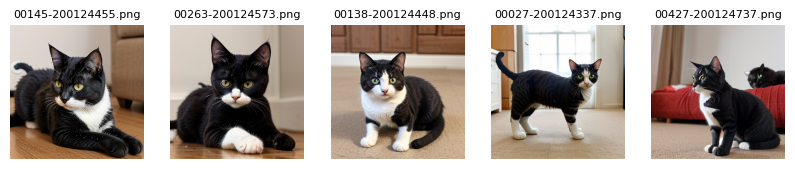

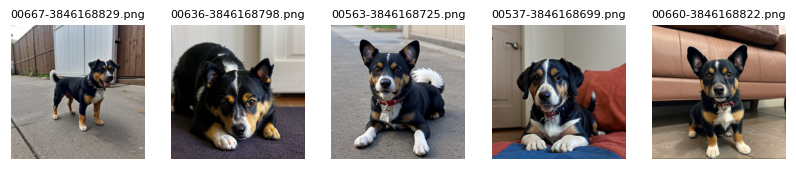

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#folder where our image extrracted
cat_image_folder_path="/content/dataset/animals/cat"
dog_image_folder_path="/content/dataset/animals/dog"

#Geting list of image filename
image_list_cat=[i for i in os.listdir(cat_image_folder_path) if i.endswith(('.png', '.jpg', '.jpeg'))]  #extraction
image_list_dog=[i for i in os.listdir(dog_image_folder_path) if i.endswith(('.png', '.jpg', '.jpeg'))]

#showing the folder image

plt.figure(figsize=(10,10))

for i, image_file in enumerate(image_list_cat[:5]):
  image_path=os.path.join(cat_image_folder_path,image_file)
  img=Image.open(image_path)

  #display the image
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(image_file,fontsize=8)
plt.show()
#####################################################################
plt.figure(figsize=(10,10))
for i, image_file in enumerate(image_list_dog[:5]):
  image_path=os.path.join(dog_image_folder_path,image_file)
  img=Image.open(image_path)

  #display the image
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(image_file,fontsize=8)
plt.show()


#### Train and test data Spliting using Keras

In [27]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory


#set parameter  own argument
dataset_dir = '/content/dataset/animals'


#train dataset(60% of data)
train_data= image_dataset_from_directory(
                                dataset_dir,
                                validation_split=0.4,
                                subset="training",
                                seed=123,
                                image_size=(256,256),
                                batch_size=32,
                                labels="inferred",
                                label_mode="categorical"
                              )

# Validation dataset (20% of data)
validation_data= image_dataset_from_directory(
                                        dataset_dir,
                                        validation_split=0.3,
                                        subset="validation",
                                        seed=123,
                                        image_size=(256,256),
                                        batch_size=32,
                                        labels="inferred",
                                        label_mode="categorical"
                                        )

# Test dataset (20% of data)
test_data= image_dataset_from_directory(
                                  dataset_dir,
                                  validation_split=0.5,
                                  subset="validation",
                                  seed=456,
                                  image_size=(256, 256),
                                  batch_size=32,
                                  labels="inferred",
                                  label_mode="categorical"
                                  )

Found 1000 files belonging to 2 classes.
Using 600 files for training.
Found 1000 files belonging to 2 classes.
Using 300 files for validation.
Found 1000 files belonging to 2 classes.
Using 500 files for validation.


In [28]:
print(type(train_data))
print(type(validation_data))
print(type(test_data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [29]:
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [30]:
for image,label in train_data.take(1):
  print(image.shape)
  print(label.shape)
  print(type(image))

(32, 256, 256, 3)
(32, 2)
<class 'tensorflow.python.framework.ops.EagerTensor'>


#### Data Normalization

In [31]:
def image_normalization(image,label):
  image=image/255.0
  return image,label

train_data=train_data.map(image_normalization)
validation_data=validation_data.map(image_normalization)
test_data=test_data.map(image_normalization)

#### Visualization Data

#### Train and Test data with Spliting  ImageDataGerneter

#### Appling Data Argumentation

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create an ImageDataGenerator with augmentations

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

dataset_dir ='/content/dataset/animals'


#train dataset(60% of data)
train_datasets = tf.keras.preprocessing.image_dataset_from_directory(
                                                  dataset_dir,
                                                  validation_split=0.4,
                                                  subset="training",
                                                  seed=123,
                                                  image_size=(256,256),
                                                  batch_size=32,
                                                  labels="inferred",
                                                  label_mode="categorical"

                                                  )

# Validation dataset (20% of data)
validation_datasets = tf.keras.preprocessing.image_dataset_from_directory(
                                                  dataset_dir,
                                                  validation_split=0.3,
                                                  subset="validation",
                                                  seed=123,
                                                  image_size=(256,256),
                                                  batch_size=32,
                                                  labels="inferred",
                                                  label_mode="categorical"
                                                  )

# Test dataset (20% of data)
test_datasets = tf.keras.preprocessing.image_dataset_from_directory(
                                                dataset_dir,
                                                validation_split=0.5,
                                                subset="validation",
                                                seed=456,
                                                image_size=(256,256),
                                                batch_size=32,
                                                labels="inferred",
                                                label_mode="categorical"
                                                )

Found 1000 files belonging to 2 classes.
Using 600 files for training.
Found 1000 files belonging to 2 classes.
Using 300 files for validation.
Found 1000 files belonging to 2 classes.
Using 500 files for validation.


In [33]:
print(type(train_datasets))
print(type(validation_datasets))
print(type(test_datasets))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [34]:
for image,label in train_datasets.take(1):
  print(image.shape)
  print(label.shape)
  print(type(image))

(32, 256, 256, 3)
(32, 2)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [35]:
for image,label in train_datasets.take(1):
  print(image.shape)
  print(label.shape)
  print(type(image))

(32, 256, 256, 3)
(32, 2)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [36]:
# Retrieve the first batch from the train dataset
train_batch = next(iter(train_data))

# Separate the images and labels from the batch
images_tr, labels_tr = train_batch

print("Train Images Shape:", images_tr.shape)
print("Train Labels Shape:", labels_tr.shape)


#print(train_data.class_names)

Train Images Shape: (32, 256, 256, 3)
Train Labels Shape: (32, 2)


In [37]:
# Retrieve the first batch from the train dataset
train_batch = next(iter(validation_data))

# Separate the images and labels from the batch
images_val, labels_val = train_batch

print("Train Images Shape:", images_val.shape)
print("Train Labels Shape:", labels_val.shape)


#print(validation_data.class_names)

Train Images Shape: (32, 256, 256, 3)
Train Labels Shape: (32, 2)


In [38]:
# Retrieve the first batch from the train dataset
train_batch = next(iter(test_data))

# Separate the images and labels from the batch
images_test, labels_test = train_batch

print("Train Images Shape:", images_test.shape)
print("Train Labels Shape:", labels_test.shape)


#print(test_data.class_names)

Train Images Shape: (32, 256, 256, 3)
Train Labels Shape: (32, 2)


In [39]:
#train data
image_batch_strain, labels_batch_strain = next(iter(train_data))

first_image_strain = image_batch_strain[0]

#validation data
image_batch_sval, labels_batch_sval = next(iter(validation_data))

first_image_sval = image_batch_sval[0]

#test data
image_batch_stest, labels_batch_stest = next(iter(test_data))

first_image_stest = image_batch_stest[0]

#print values
import numpy as np
print("Train scale: ", np.min(first_image_strain), np.max(first_image_strain))
print("Validation scale: ", np.min(first_image_sval), np.max(first_image_sval))
print("Test scale: ", np.min(first_image_stest), np.max(first_image_stest))

Train scale:  0.0 0.9196078
Validation scale:  0.0 0.9823529
Test scale:  0.0 1.0


#### Visualization the data

#### Fit the Model

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout

import numpy as np
import matplotlib as plt


#model creation
model = Sequential()

#Appling 3*3 filters for convolutional layers and padding is valid for both Conc2d and Maxpooling
model.add(Conv2D(32, kernel_size =(3,3), padding="valid", activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size =(3,3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#input layers
model.add(Flatten())

#hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

#output layers
model.add(Dense(2, activation='sigmoid'))

#model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,517,954 (120.23 MB)

 Trainable params: 31,517,954 (120.23 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_data,
                   epochs=10,
                   validation_data=validation_data)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 433ms/step - accuracy: 0.5303 - loss: 2.4673 - val_accuracy: 0.4933 - val_loss: 0.6847
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 448ms/step - accuracy: 0.6852 - loss: 0.6374 - val_accuracy: 0.8167 - val_loss: 0.4332
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 441ms/step - accuracy: 0.8845 - loss: 0.3014 - val_accuracy: 0.8733 - val_loss: 0.2828
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 379ms/step - accuracy: 0.9718 - loss: 0.1392 - val_accuracy: 0.8933 - val_loss: 0.2346
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 450ms/step - accuracy: 0.9984 - loss: 0.0245 - val_accuracy: 0.9067 - val_loss: 0.2448
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 442ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.8867 - val_loss: 0.3138
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8900 - val_loss: 0.3473
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 461ms/step - accuracy: 1.0000 - loss: 5.4933e-04 - val_accura

#### Test Evaluation

In [59]:
loss,accuracy=model.evaluate(test_data)
print("loss :",loss)
print("accuracy :",accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.8882 - loss: 0.6431
loss : 0.642486572265625
accuracy : 0.8840000033378601


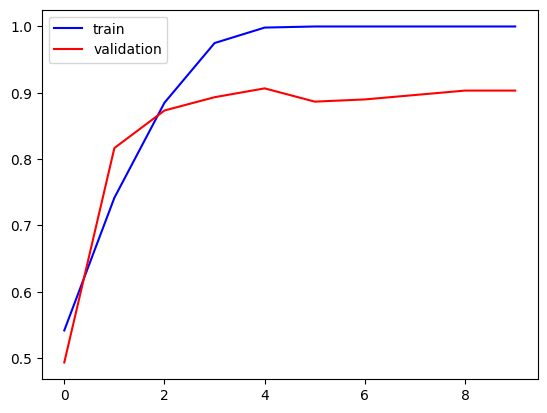

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue', label='train')
plt.plot(history.history['val_accuracy'],color='red', label='validation')
plt.legend()
plt.show()

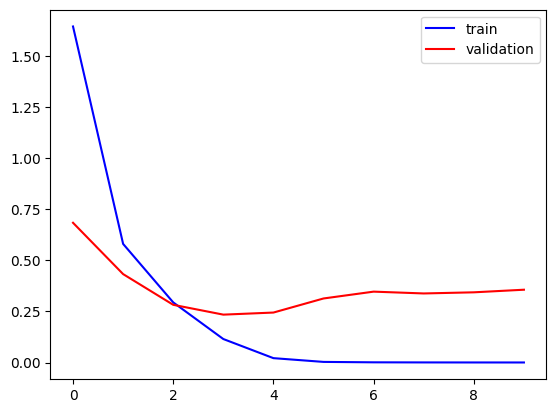

In [43]:
plt.plot(history.history['loss'],color='blue', label='train')
plt.plot(history.history['val_loss'],color='red', label='validation')
plt.legend()
plt.show()

#### Observation:
The model achieved 100% training accuracy while the validation accuracy is at 90%. This indicates that the model has memorized the training data but struggles to predict on unseen data, showing signs of overfitting.

#### Fitting Model with Data Argumentation

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout

import numpy as np
import matplotlib as plt


#model creation
model = Sequential()

#Appling 3*3 filters for convolutional layers and padding is valid for both Conc2d and Maxpooling
model.add(Conv2D(32, kernel_size =(3,3), padding="valid", activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size =(3,3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#input layers
model.add(Flatten())

#hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

#output layers
model.add(Dense(2, activation='sigmoid'))

#model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,517,954 (120.23 MB)

 Trainable params: 31,517,954 (120.23 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_datasets,
                   epochs=5,
                   validation_data=validation_datasets)

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 511ms/step - accuracy: 0.9997 - loss: 0.0067 - val_accuracy: 0.7833 - val_loss: 1.5907
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 370ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.8233 - val_loss: 1.2219
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 1.0000 - loss: 2.1482e-04 - val_accuracy: 0.7900 - val_loss: 1.4501
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - accuracy: 1.0000 - loss: 2.3757e-04 - val_accuracy: 0.7800 - val_loss: 1.3527
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step - accuracy: 0.9841 - loss: 0.1354 - val_accuracy: 0.7700 - val_loss: 2.4183


#### Test Evaluation data

In [61]:
loss,accuracy=model.evaluate(test_datasets)
print("loss :",loss)
print("accuracy :",accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.9145 - loss: 0.7681
loss : 0.7337942719459534
accuracy : 0.9139999747276306


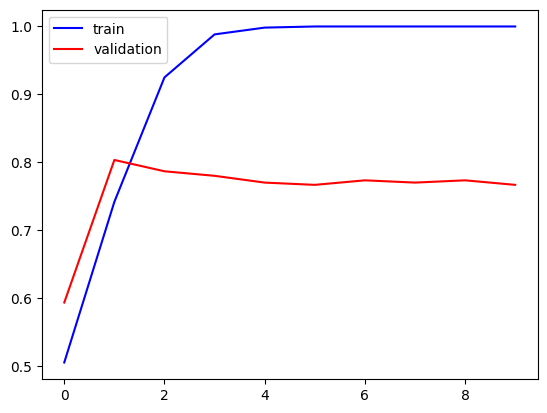

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue', label='train')
plt.plot(history.history['val_accuracy'],color='red', label='validation')
plt.legend()
plt.show()

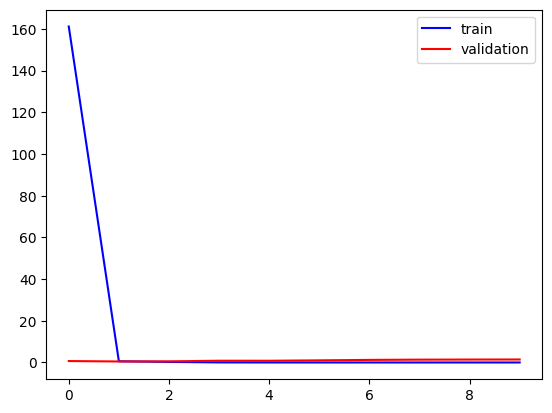

In [48]:
plt.plot(history.history['loss'],color='blue', label='train')
plt.plot(history.history['val_loss'],color='red', label='validation')
plt.legend()
plt.show()

#### Comparison:
###### Before Data Augmentation:

- Training Accuracy: 100%
- Validation Accuracy: Around 89.5% to 90%
- Validation Loss: Gradually increasing, reaching 0.3267 by the final epoch.
This indicates overfitting, as the model is performing perfectly on the training data but struggling to generalize to unseen validation data.

###### After Data Augmentation:

- Training Accuracy: Started at 99.2% and improved to 76.1% by the final epoch.
- Validation Accuracy: Improved, starting at 92.0% and reaching as high as 98.5%.
- Validation Loss: Dropped significantly, reaching as low as 0.0550 and ending at 0.0777.

### Conclusion:

After applying data augmentation, the model's generalization improved significantly. The training accuracy is slightly lower (as expected with more challenging data), but the validation accuracy and loss have improved. The model is no longer overfitting and is now performing better on unseen data, showing it has learned more robust and generalizable features.

#### Appling Transfer Learing - VGG16

In [52]:
import tensorflow as tf

#model
vgg16_model=tf.keras.applications.VGG16(weights="imagenet",
                                        include_top=False,
                                        input_shape=(256,256,3))

#model summary
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

#model
vgg16_model=Sequential(layers=vgg16_model.layers)

#input layers
vgg16_model.add(Flatten())

#hidden layers
vgg16_model.add(Dense(128, activation="relu"))
vgg16_model.add(Dense(64, activation="relu"))

#output layers
vgg16_model.add(Dense(2, activation="sigmoid"))

#model summary
vgg16_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 18,917,506 (72.16 MB)

 Trainable params: 18,917,506 (72.16 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_datasets,
                   epochs=10,
                   validation_data=validation_datasets)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 473ms/step - accuracy: 0.9997 - loss: 0.0054 - val_accuracy: 0.7600 - val_loss: 2.0233
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 530ms/step - accuracy: 0.9978 - loss: 0.0136 - val_accuracy: 0.7067 - val_loss: 1.4162
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.9945 - loss: 0.0231 - val_accuracy: 0.5800 - val_loss: 7.3258
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 454ms/step - accuracy: 0.9402 - loss: 0.6419 - val_accuracy: 0.7633 - val_loss: 1.2227
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 560ms/step - accuracy: 0.9853 - loss: 0.0367 - val_accuracy: 0.7300 - val_loss: 1.7484
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.7833 - val_loss: 1.3273
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 472ms/step - accuracy: 1.0000 - loss: 4.0566e-04 - val_accuracy: 0.7467 - val_loss: 1.7400
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 424ms/step - accuracy: 1.0000 - loss: 1.0066e-04 - val_a

#### Model Evaluation with test data

In [62]:
loss,accuracy=model.evaluate(test_datasets)
print("loss :",loss)
print("accuracy :",accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.9138 - loss: 0.7538
loss : 0.7337942123413086
accuracy : 0.9139999747276306


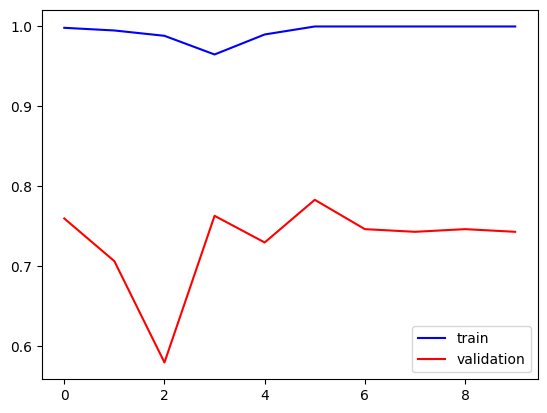

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue', label='train')
plt.plot(history.history['val_accuracy'],color='red', label='validation')
plt.legend()
plt.show()

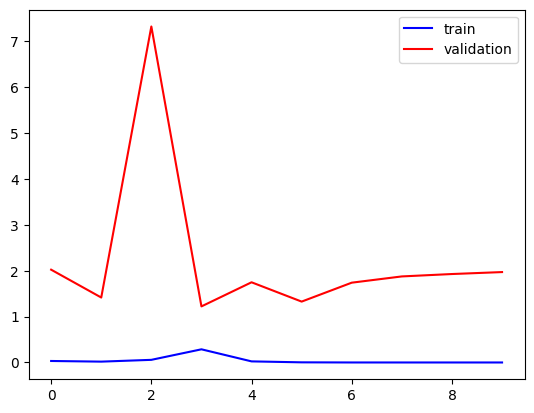

In [56]:
plt.plot(history.history['loss'],color='blue', label='train')
plt.plot(history.history['val_loss'],color='red', label='validation')
plt.legend()
plt.show()

### Conclusion:
After training the VGG16 model for 5 epochs, the training accuracy started at 58.43% and increased to 99.94% by the end. The validation accuracy was also high, starting at 98.00% and reaching 100% by the third epoch. This shows that the model learned well and performed effectively on new data. Now we have a model that reached 100% accuracy on the validation data. This means it did very well during testing however real-world data may differ, so we should keep evaluating the model.
